# Optimisez la gestion des données d'une boutique Python
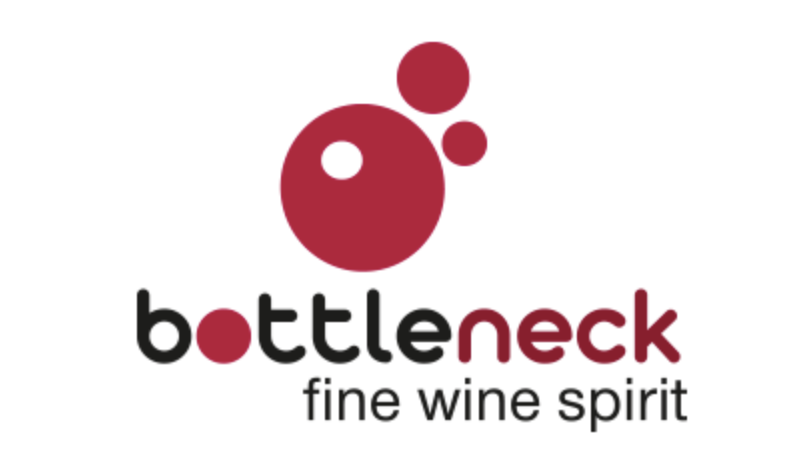

## P1 : Analyse des données & mise en forme des données

### Importation des packages

In [1]:
import pandas as pd

Pandas est une bibliothèque open-source permettant la manipulation et l’analyse de données de manière simple et intuitive en Python.

In [2]:
import numpy as np

La bibliothèque NumPy permet d’effectuer des calculs numériques avec Python. Elle introduit une gestion facilitée des tableaux de nombres.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

- Le module pyplot de matplotlib est l’un de ses principaux modules. Il regroupe un grand nombre de fonctions qui servent à créer des graphiques et les personnaliser (travailler sur les axes, le type de graphique, sa forme et même rajouter du texte).
- Le module cm de matplotlib permet d'inmporter de nouvelles couleurs.

In [4]:
import seaborn as sns

Seaborn est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur Matplotlib, et s’intègre avec les structures Pandas.

### Importation et mise en forme du fichier erp2.csv (erp)

Importation du fichier erp, verification du fichier avec .head & .info

In [5]:
erp = pd.read_csv('erp2.csv', sep=";")

In [6]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [7]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Je verifie qu'il n'y ai pas de doublon :

In [8]:
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


Je constate qu'il n'y a pas de doublon sur la colonne product_id, donc je pourrai l'utiliser comme clé primaire par la suite.

### Importation et mise en forme du fichier liaison2.csv (liaison)

Importation du fichier liaison, verification du fichier avec .head & .info

In [9]:
liaison = pd.read_csv('liaison2.csv',sep=";")

In [10]:
liaison.head()

,product_id,id_web
0,3847,15298.0
1,3849,15296.0
2,3850,15300.0
3,4032,19814.0
4,4039,19815.0


In [11]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  825 non-null    int64  
 1   id_web      731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.0 KB


Je verifie qu'il n'y ai pas de doublon sur la colonne product_id.

In [12]:
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

,product_id,id_web


Je constate qu'il n'y a pas de doublon sur la colonne product_id, donc je pourrai l'utiliser comme clé primaire par la suite.

Je vois qu'il y a des valeurs vides dans le fichier, je remplace ces valeurs par 0 et je change le type de l'id_web pour avoir un affichage plus propre, je vérifie le résultat.

In [13]:
liaison.fillna(0,inplace=True)
liaison['id_web']=liaison['id_web'].astype(int)
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  825 non-null    int64
 1   id_web      825 non-null    int64
dtypes: int64(2)
memory usage: 13.0 KB


Je renomme ma colonne id_web par sku en vue d'une jointure avec la table web et je vérifie le résultat.

In [14]:
liaison.rename(columns={"id_web" :"sku"}, inplace=True)
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  825 non-null    int64
 1   sku         825 non-null    int64
dtypes: int64(2)
memory usage: 13.0 KB


### Importation et mise en forme du fichier web.xlxs (web)

Importation du fichier web, verification du fichier avec .head & .info

In [15]:
web = pd.read_excel('web.xlsx')

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [16]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

<b>J'analyse la table car il y a beaucoup de colonnes :</b>

sku = identifiant web    
virtual = si le produit est virtuel   
downloadable = si le produit est téléchargeable   
rating_count = nombre de note laissé par les clients  
average_rating = la moyenne des notes de chaque produit  
total_sales = nombre de vente  
tax_status = indique si le produit est taxé  
tax_class = indique la classe de la taxe / TVA     
post_date = date de création de la fiche produit (heure locale)  
post_date_gmt = date de création de la fiche produit > Greenwich Mean Time (GMT)  
post_content = contenu de la BDD  
post_title = nom du produit  
post_excerpt = résumé du contenu de la fiche produit  
post_status = le status du post (publié ou non)  
comment_status = autoriser ou non les commentaires  
ping_status = autoriser ou non les notifications  
post_password =  affiche le mdp de publication  
post_name = nom du produit (ASCII)  
post_modified = date de modification de la fiche produit (heure locale)  
post_modified_gmt = date de modification de la fiche produit > Greenwich Mean Time (GMT)  
post_content_filtered = contenu de la BDD filtré  
post_parent = si les produits sont au même niveau sur le site (=0 > page princiale)  
guid = lien du produit  
menu_order = trie des produits (avec différents niveaux)  
post_type = renvoie les étiquettes par défaut pour les types de publication, ici 'product' ou 'attachement'  
post_mime_type = le type de contenu associé au produit, ici contenu dans 'attachement' (Multipurpose Internet Mail Extensions)  
comment_count = nombre de commentaire laissé par le client

Ensuite je comptabilise le nombre de valeur manquante sur chaque colonne.

In [18]:
nb_na = web.isnull().sum()
nb_na[nb_na>0]

sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Je me concentre sur la colonne d'identifiant sku pour en faire une clé primaire.
J'analyse dans un premier temps les valeurs nulles de la table, en créant une table nan.

In [19]:
df_sku_na = web.loc[web['sku'].isnull(),:]
df_sku_na

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je vois que lorque ma colonne sku n'est pas renseigné, mes autres colonnes sont vides aussi, il n'y a pas de valeur a récupérer.
Je fais le même travaille mais en conservant uniquement les valeurs renseigné dans sku.


In [20]:
df_sku_sans_nan = web.dropna(subset=['sku'])
df_sku_sans_nan

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


En étudiant la table web précedemment, nous avons pu voir que l'extraction des données de la boutique en ligne n'avait pas été filtré, nous avons toutes les informations brutes.  
Notamment tous les types de post, c'est a dire les produits (ce qui nous interesse) et les attachements (qui sont les visuels de nos bouteilles).
Nous allons donc filtrés nos données sur les produits et vérifier le résultat.

In [21]:
df_web = df_sku_sans_nan[(df_sku_sans_nan['post_type']== 'product')]
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [23]:
len(df_web)

714

Je vérifie qu'il n'y ai pas de doublon.

In [24]:
df_web.loc[df_web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


Il n'y a pas de doublon, 'sku' va pouvoir devenir une clé primaire.

## P2 Rapprocher les deux exports grâce à la table de liaison (ERP et WEB)

Je commence par faire une jointure entre mes tables erp et liaison, je vérifie le résultat.

In [25]:
erp_liaison = pd.merge(erp, liaison, on='product_id', how='left')
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,0
821,7204,0,45.0,9,instock,0
822,7247,1,54.8,23,instock,0
823,7329,0,26.5,14,instock,0


In [26]:
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   sku             825 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


Je fais ensuite une jointure entre mes tables erp_liaison et df_web, je vérifie le résultat.

In [27]:
erp_web = pd.merge(df_web, erp_liaison, on='sku', how='left', indicator=True)
erp_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,0.0,product,NaN,0.0,NaN,NaN,NaN,NaN,NaN,left_only
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,0.0,product,NaN,0.0,3847.0,1.0,24.2,0.0,outofstock,both
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,0.0,product,NaN,0.0,3849.0,1.0,34.3,0.0,outofstock,both
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,0.0,product,NaN,0.0,3850.0,1.0,20.8,0.0,outofstock,both
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,0.0,product,NaN,0.0,4032.0,1.0,14.1,0.0,outofstock,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,0.0,product,NaN,0.0,6930.0,1.0,8.4,83.0,instock,both
710,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,0.0,product,NaN,0.0,7023.0,1.0,27.5,15.0,instock,both
711,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,0.0,product,NaN,0.0,7025.0,1.0,69.0,2.0,instock,both
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,0.0,product,NaN,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [28]:
erp_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

## P3 Calcul du chiffre d'affaires
### Calcul du chiffre d’affaires par produit

Je simplifie ma table pour faire les calculs de CA. 

In [29]:
erp_web_CA = erp_web[['sku','onsale_web','price','total_sales']]
erp_web_CA

,sku,onsale_web,price,total_sales
0,bon-cadeau-25-euros,NaN,NaN,10.0
1,15298,1.0,24.2,6.0
2,15296,1.0,34.3,0.0
3,15300,1.0,20.8,0.0
4,19814,1.0,14.1,3.0
...,...,...,...,...
709,16135,1.0,8.4,5.0
710,15891,1.0,27.5,0.0
711,15887,1.0,69.0,0.0
712,13127-1,NaN,NaN,0.0


In [30]:
erp_web_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          714 non-null    object 
 1   onsale_web   712 non-null    float64
 2   price        712 non-null    float64
 3   total_sales  714 non-null    float64
dtypes: float64(3), object(1)
memory usage: 27.9+ KB


Je m'aperçois que le bon d'achat vendu sur le site n'a pas son prix renseigné, je le renseigne, en modifiant ma table.

In [31]:
erp_web_CA.iat[0,2]=25
erp_web_CA

,sku,onsale_web,price,total_sales
0,bon-cadeau-25-euros,NaN,25.0,10.0
1,15298,1.0,24.2,6.0
2,15296,1.0,34.3,0.0
3,15300,1.0,20.8,0.0
4,19814,1.0,14.1,3.0
...,...,...,...,...
709,16135,1.0,8.4,5.0
710,15891,1.0,27.5,0.0
711,15887,1.0,69.0,0.0
712,13127-1,NaN,NaN,0.0


Pour avoir le CA par produit, je créé une nouvelle colonne en multipliant le prix par le nombre total de vente, et je vérifie le résultat.

In [32]:
erp_web_CA['CAHT'] = erp_web_CA['price'] * erp_web_CA['total_sales']
erp_web_CA

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_44531/2845893725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web_CA['CAHT'] = erp_web_CA['price'] * erp_web_CA['total_sales']


,sku,onsale_web,price,total_sales,CAHT
0,bon-cadeau-25-euros,NaN,25.0,10.0,250.0
1,15298,1.0,24.2,6.0,145.2
2,15296,1.0,34.3,0.0,0.0
3,15300,1.0,20.8,0.0,0.0
4,19814,1.0,14.1,3.0,42.3
...,...,...,...,...,...
709,16135,1.0,8.4,5.0,42.0
710,15891,1.0,27.5,0.0,0.0
711,15887,1.0,69.0,0.0,0.0
712,13127-1,NaN,NaN,0.0,NaN


### Calcul du chiffre d’affaires réalisé en ligne

Je créé une table en filtrant mes données sur onsale_web qui nous donnent les références vendues en ligne. (1 = vendu en ligne, 0 = non vendu en ligne)

In [33]:
CA_web = erp_web_CA[(erp_web_CA['onsale_web']== 1)]
CA_web

,sku,onsale_web,price,total_sales,CAHT
1,15298,1.0,24.2,6.0,145.2
2,15296,1.0,34.3,0.0,0.0
3,15300,1.0,20.8,0.0,0.0
4,19814,1.0,14.1,3.0,42.3
5,19815,1.0,46.0,0.0,0.0
...,...,...,...,...,...
708,15741,1.0,19.0,2.0,38.0
709,16135,1.0,8.4,5.0,42.0
710,15891,1.0,27.5,0.0,0.0
711,15887,1.0,69.0,0.0,0.0


In [34]:
CA_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 713
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          712 non-null    object 
 1   onsale_web   712 non-null    float64
 2   price        712 non-null    float64
 3   total_sales  712 non-null    float64
 4   CAHT         712 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.4+ KB


Je fais ensuite la somme de la colonne CAHT pour avoir le CAHT total des produits vendus en ligne et j'affiche le résultat.

In [35]:
#résultat avec filtre onsale_web > différence liée au bon d'achat de 25euros
CA_onsale_web = CA_web['CAHT'].sum()
CA_onsale_web

70318.6

In [36]:
#résultat sans filtre onsale_web
CA_onsale_web2 = erp_web_CA['CAHT'].sum()
CA_onsale_web2

70568.6

In [37]:
print('Le CAHT des produits vendus en ligne est de', CA_onsale_web2 ,'euros.')

Le CAHT des produits vendus en ligne est de 70568.6 euros.


Text(0, 60000, '70 568.6 €')

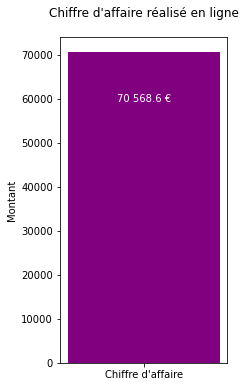

In [38]:
#Représentation graphique du CA
#Je choisis la taille de mon graphique
plt.figure(figsize = (3, 6))
#Je créé mon graphique en barre
plt.bar("Chiffre d'affaire",
        erp_web_CA['CAHT'].sum(), color='purple')
#J'affiche le titre de mon graphique
plt.title("Chiffre d'affaire réalisé en ligne", pad=20)
#J'affiche le nom de mon axe y
plt.ylabel('Montant')
#Je place mes résultats sur les colonnes correspondantes (étiquette de données)
plt.text(0, 60000,'70 568.6 €', horizontalalignment = 'center', verticalalignment = 'center', color='white')

## P4 Analyse de la variable prix (univariée)

Je reprends ma table erp_web_CA et je fais un .describe() qui nous permet de voir les différentes statistiques de chaque colonne.

In [39]:
erp_web_CA.describe()

,onsale_web,price,total_sales,CAHT
count,712.0,713.000000,714.000000,713.000000
mean,1.0,32.461851,4.012605,98.974194
std,0.0,27.817471,8.518183,307.878755
min,1.0,5.200000,0.000000,0.000000
25%,1.0,14.100000,0.000000,0.000000
50%,1.0,23.500000,1.000000,15.300000
75%,1.0,42.100000,4.000000,91.200000
max,1.0,225.000000,96.000000,4704.000000


In [40]:
erp_web_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          714 non-null    object 
 1   onsale_web   712 non-null    float64
 2   price        713 non-null    float64
 3   total_sales  714 non-null    float64
 4   CAHT         713 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.5+ KB


Pour commencer mon analyse, je vais tout d'abord sélectionner mes données, en prenant uniquement la colonne 'price' et en supprimant les valeurs manquantes.

In [41]:
df_price_b = erp_web_CA['price']
df_price_b.info()

<class 'pandas.core.series.Series'>
Int64Index: 714 entries, 0 to 713
Series name: price
Non-Null Count  Dtype  
--------------  -----  
713 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [42]:
df_price_b1 = df_price_b.dropna()

J'aurai pu faire : df_price_b.fillna(df_price_b.mean()) #moyenne ou .mode() #valeur la plus présente, cependant je supprime la seule valeur manquante.

<b>Pour mon analyse univariée je calcule ensuite les mesures de tendance centrale qui vont me permettre d'avoir une idée de la valeur autour de laquelle se concentrent l'ensemble des valeurs de la variable prix :</b>

Je calcule le mode, .mode(), qui détermine la valeur la plus fréquente dans la variable.

In [43]:
df_price_b1.mode()

0    19.0
Name: price, dtype: float64

Je calcule la moyenne, .mean(), qui détermine la moyenne de la variable.

In [44]:
df_price_b1.mean()

32.461851332398325

Je calcule la mediane, .median(), la valeur telle que 50 % des observations de l'échantillon lui sont inférieures.

In [45]:
df_price_b1.median()

23.5

<b>Ensuite je calcule les mesures de dispersion, elles vont me permettre de compléter les mesures de tendance centrales, en précisant la façon dont les valeurs se répartissent autour de ces dernières :</b>

Je calcule la variance, .var(), elle résume l’ensemble des écarts entre la moyenne et les valeurs mesurées. Elle indique de quelle manière se dispersent les valeurs mesurées par rapport à sa moyenne.

In [46]:
df_price_b1.var()

773.8117167924736

Je calcule l'écart-type, .std(), qui sert à mesurer la dispersion, ou l'étalement, d'un ensemble de valeurs autour de leur moyenne. Plus l'écart-type est faible, plus la variable est homogène.

In [47]:
df_price_b1.std()

27.81747143060407

Je calcule le coefficient de variation, df.std()/df.mean(), permettant de comparer le degré de variation d’un échantillon à un autre, même si les moyennes sont différentes.

In [48]:
df_price_b1.std()/df_price_b1.mean()

0.8569280644459435

<b> Pour detecter les outliers j'utilise la méthode des interquartiles: </b>

Un outliers corresppond à une valeur éloignée de la distribution de la variable (erreur de typographie, de mesure ...).

Tout d'abord, j'ordonne la table df_price, je la transforme en dataFrame pour le visuel

In [49]:
df_price1 = df_price_b1.sort_values()
df_price1 = pd.DataFrame(df_price1)
df_price1

,price
645,5.2
98,5.7
99,5.7
560,5.7
100,5.7
...,...
553,175.0
219,176.0
587,191.3
426,217.5


Je calcule le quartile q1 (25)

In [50]:
q1 = np.percentile(df_price1,25)
print("q1 = " + str(q1))

q1 = 14.1


Je calcule le quartile q3 (75)

In [51]:
q3 = np.percentile (df_price1,75)
print("q3 = " + str (q3))

q3 = 42.1


Je calcule l'écart intercatile (iqr), qui va me permettre de calculer mes bornes inférieure et supérieure.

In [52]:
iqr = q3 - q1
print("iqr = " + str(iqr))

iqr = 28.0


Je calcule la borne inférieure à l'aide de q1 et de l'écart intercartile.

In [53]:
borne_inf = q1 - (1.5 * iqr)
print("borne inférieure = " + str (borne_inf))

borne inférieure = -27.9


Je calcule la borne supérieure à l'aide de q3 et de l'écart intercartile

In [54]:
borne_sup = q3 + (1.5 * iqr)
print("borne supérieure = " + str(borne_sup))

borne supérieure = 84.1


Pour détecter les outliers, je créer une table outliers, ou je met les valeurs inférieur a la borne inférieure, et les valeurs supérieurs à la borne supérieure calculer précedemment.

In [55]:
outliers = erp_web_CA[(erp_web_CA['price'] > borne_sup) | (erp_web_CA['price'] < borne_inf)]

In [56]:
print("Nombre d'outliers détectés " + str(len(outliers)))

Nombre d'outliers détectés 32


Voici la liste des outliers détectés :

In [57]:
outliers['price']

64     100.0
66      88.4
200    225.0
202    126.5
206     85.6
219    176.0
220    108.5
222    157.0
223    104.0
228    109.6
381    102.3
382    137.0
426    217.5
431    105.0
432    105.0
437    112.0
438     86.8
502     92.0
511    124.8
553    175.0
587    191.3
602     93.0
603    122.0
604    114.0
642    135.0
647    105.6
648    116.4
653    115.0
654    121.0
655     99.0
656    115.0
657    121.0
Name: price, dtype: float64

<b> Présentation graphique de l'analyse univariée sur la variable 'price' : </b>

Je décide de faire un graphique nuage de point pour représenter la variable 'price' en séparant les outliers de la variable price, pour les distinguer.
- Je créer une table data_outliers en reprenant la variable price, en conservant les valeurs inférieurs à la borne inférieure, et les valeurs supérieurs à la borne supérieure calculer précedemment.
- Je créer une table data_ok qui prendra toute les données entre la borne inférieure et la borne supérieure.

In [58]:
data_outliers = erp_web_CA[(erp_web_CA['price'] > borne_sup) | (erp_web_CA['price'] < borne_inf)]
data_ok = erp_web_CA[(erp_web_CA['price'] < borne_sup) | (erp_web_CA['price'] > borne_inf)]

Je créer ensuite mon graphique en utilisant matplotlib :

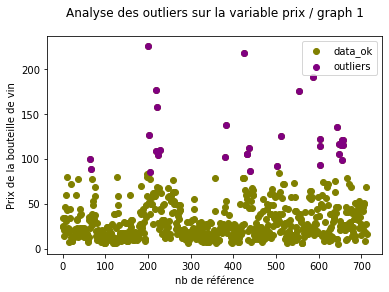

In [59]:
plt.scatter(data_ok['price'].index, data_ok['price'].values, c= 'olive', label='data_ok')
plt.scatter(data_outliers['price'].index, data_outliers['price'].values, c='purple', label='outliers')
#J'affiche le titre de mon graphique
plt.title("Analyse des outliers sur la variable prix / graph 1", pad=20)
#J'affiche le nom de mon axe x
plt.xlabel('nb de référence')
#J'affiche le nom de mon axe y
plt.ylabel('Prix de la bouteille de vin')
#J'affiche la légende
plt.legend()
plt.show()

Ensuite je fais un boxplot (diagramme à moustache) qui nous montre bien aussi les outliers visuellement, sans calcul préalable et nous donne une idées des données.
J'utilise seaborn pour ce graphique.

Text(0.5, 1.0, 'Analyse des outliers sur la variable prix / graph 2')

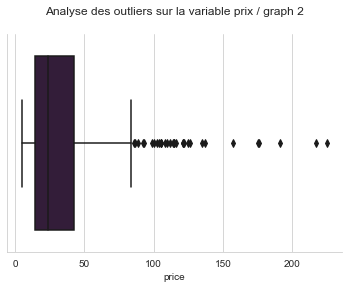

In [60]:
sns.set_style("whitegrid")
sns.boxplot(x = 'price', data=erp_web_CA, palette=sns.color_palette("rocket"))
#Je fais un boxplot horizontal
sns.despine(left=False)
#J'affiche le titre de mon graphique
plt.title("Analyse des outliers sur la variable prix / graph 2", pad=20)

<b>Conclusion </b>  
Pour conclure, on détecte 32 prix qui se décrochent de l'ensemble de la variable. 
Cependant je ne pense pas qu'il faille supprimer ces outliers. 
En effet les prix sont plus chers, mais dans le domaine viticole les prix peuvent aussi être trés élevé, il peut s'agire de grand cru.
Il faudrait vérifier sur les 32 outliers, la référence si nous avons un doute.